In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from IPython.display import clear_output
import time
from pathlib import Path
from matplotlib.patches import Circle
from importlib import reload

import warnings
warnings.filterwarnings("ignore")

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import cgi_phasec_poppy
from cgi_phasec_poppy.math_module import xp
from cgi_phasec_poppy.imshows import *

iwa = 6
owa = 20

data_dir = cgi_phasec_poppy.data_dir

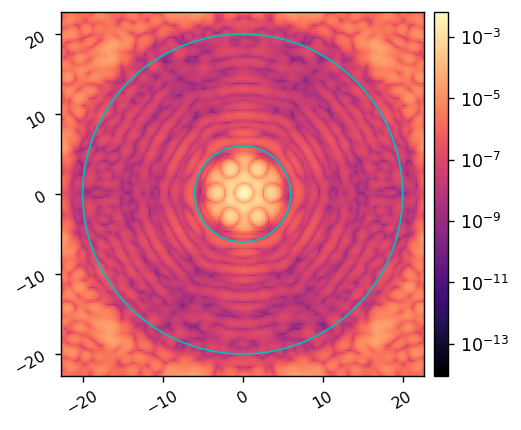

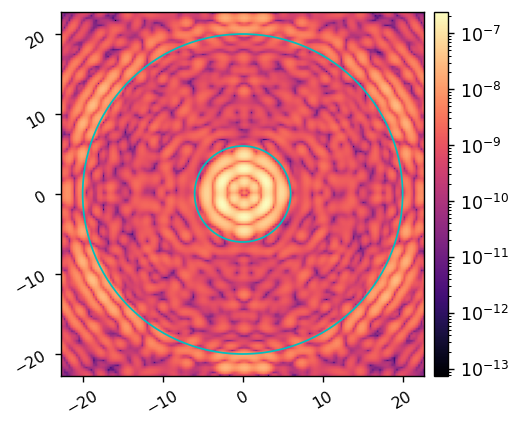

In [2]:
mode = cgi_phasec_poppy.cgi.CGI(cgi_mode='spc-wide', npsf=150)

mode.use_opds = False
mode.use_pupil_defocus = False

mode.use_fpm = False
ref_unocc_im = mode.snap()

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow1(ref_unocc_im, lognorm=True, pxscl=mode.psf_pixelscale_lamD, patches=patches)

mode.Imax_ref = ref_unocc_im.max()
mode.use_fpm = True

image = mode.snap()

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow1(image, lognorm=True, pxscl=mode.psf_pixelscale_lamD, patches=patches)

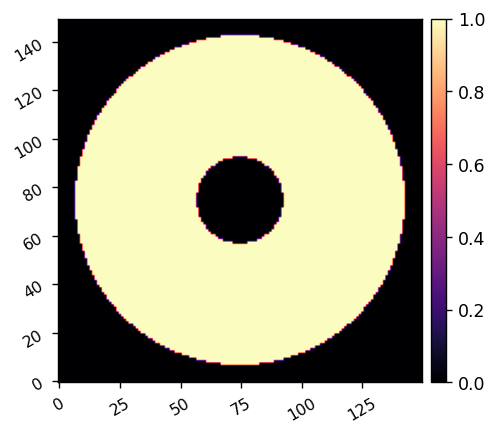

In [3]:
import lina
mask = lina.utils.create_annular_focal_plane_mask(mode, 5.4, 20.6, plot=True)

In [4]:
import scipy
proper_im = fits.getdata('proper_spc_wfov_825_unaberrated.fits')
poppy_im = scipy.ndimage.shift(np.rot90(np.rot90(ensure_np_array(image))), (1,1))
diff = proper_im-poppy_im

rms_proper = np.sqrt(np.mean(proper_im[ensure_np_array(mask)]**2))
rms_diff = np.sqrt(np.mean(diff[ensure_np_array(mask)]**2))
rms_ratio = rms_diff/rms_proper
print(rms_ratio)

mean_proper = np.mean(proper_im[ensure_np_array(mask)])
mean_poppy = np.mean(poppy_im[ensure_np_array(mask)])
mean_diff = np.mean(diff[ensure_np_array(mask)])
mean_ratio = mean_diff/mean_proper
print(mean_proper, mean_poppy, mean_diff, mean_ratio)

vmax = np.max(np.concatenate([proper_im, poppy_im]))

0.3915032606234667
1.0015068814235004e-09 1.0955376544286305e-09 -9.403077300512985e-11 -0.09388929297368222


9.388929297368222


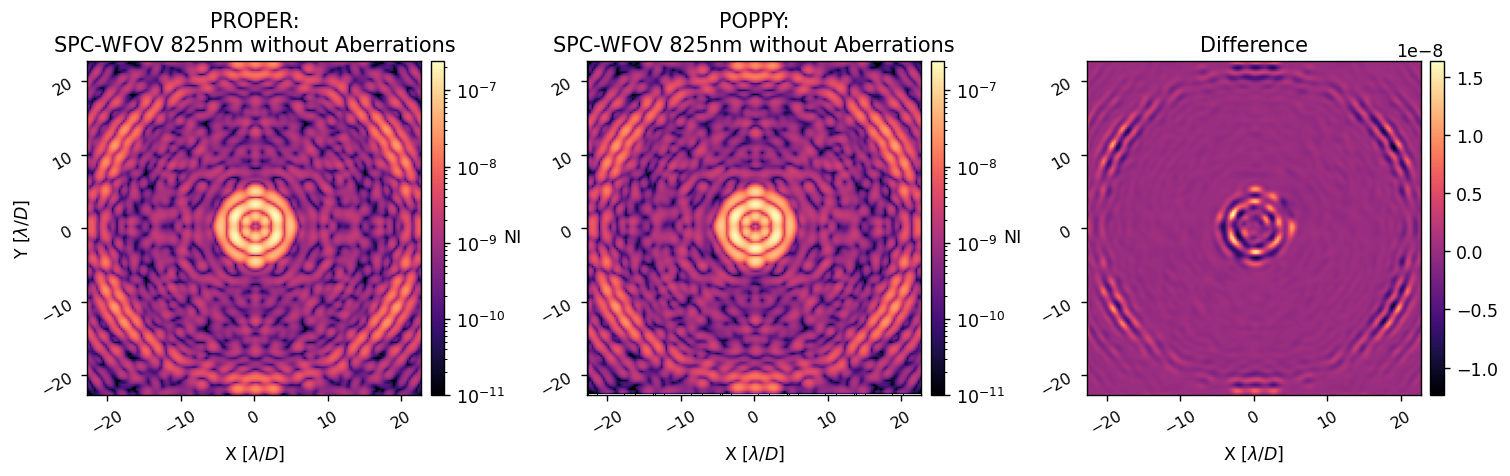

In [6]:
imname = 'SPC-WFOV 825nm without Aberrations'
print(100*abs(mean_ratio))
fig,ax = imshow3(proper_im, poppy_im, diff,
                'PROPER:\n'+imname, 'POPPY:\n'+imname, f'Difference', 
                lognorm1=True, lognorm2=True, 
                vmin1=1e-11, vmin2=1e-11, 
                vmax1=vmax, vmax2=vmax, 
                # lognorm3=True, vmin3=1e-6, vmax3=vmax, 
                pxscl=mode.psf_pixelscale_lamD,
                xlabel='X [$\lambda/D$]',
                cbar1_label='NI', cbar2_label='NI', 
                wspace=0.4,
                return_fig=True, display_fig=False,
        )

ax[0].set_ylabel('Y [$\lambda/D$]')
fig.savefig('figs/spc_wfov_825_unaberrated.pdf', format='pdf', bbox_inches="tight")
display(fig)

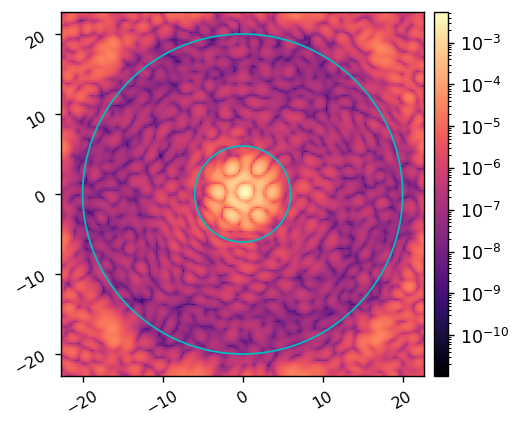

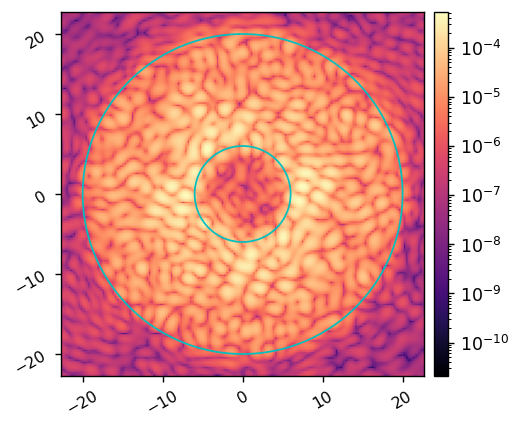

In [7]:
reload(cgi_phasec_poppy.cgi)
mode = cgi_phasec_poppy.cgi.CGI(cgi_mode='spc-wide', 
               npsf=150,
               use_pupil_defocus=True, 
               use_opds=True,
            #    source_flux=3.840e+08*u.ph/(u.s * u.m**2),
               )

# mode.set_dm1(dm1_best)
# mode.set_dm2(dm2_best)

mode.use_fpm = False
ref_unocc_im = mode.snap()

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow1(ref_unocc_im, lognorm=True, pxscl=mode.psf_pixelscale_lamD, patches=patches)

mode.Imax_ref = ref_unocc_im.max()
mode.use_fpm = True

image = mode.snap()

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow1(image, lognorm=True, pxscl=mode.psf_pixelscale_lamD, patches=patches)

# if poppy.accel_math._USE_CUPY:
#     misc.save_fits(data_dir/'spc-wide_psf_gpu.fits', psf, header={'PIXELSCL':mode.psf_pixelscale_lamD})
# else:
#     misc.save_fits(data_dir/'spc-wide_psf_cpu.fits', psf, header={'PIXELSCL':mode.psf_pixelscale_lamD})

In [8]:
import scipy
proper_im = fits.getdata('proper_spc_wfov_825_aberrated.fits')
poppy_im = scipy.ndimage.shift(np.rot90(np.rot90(ensure_np_array(image))), (1,1))
diff = proper_im-poppy_im

rms_proper = np.sqrt(np.mean(proper_im[ensure_np_array(mask)]**2))
rms_diff = np.sqrt(np.mean(diff[ensure_np_array(mask)]**2))
rms_ratio = rms_diff/rms_proper
print(rms_ratio)

mean_proper = np.mean(proper_im[ensure_np_array(mask)])
mean_poppy = np.mean(poppy_im[ensure_np_array(mask)])
mean_diff = np.mean(diff[ensure_np_array(mask)])
mean_ratio = mean_diff/mean_proper
print(mean_proper, mean_poppy, mean_diff, mean_ratio)

vmax = np.max(np.concatenate([proper_im, poppy_im]))

0.1447464117642081
3.132131854476991e-05 3.0470311797296794e-05 8.51006747473118e-07 0.027170208248312098


2.7170208248312098


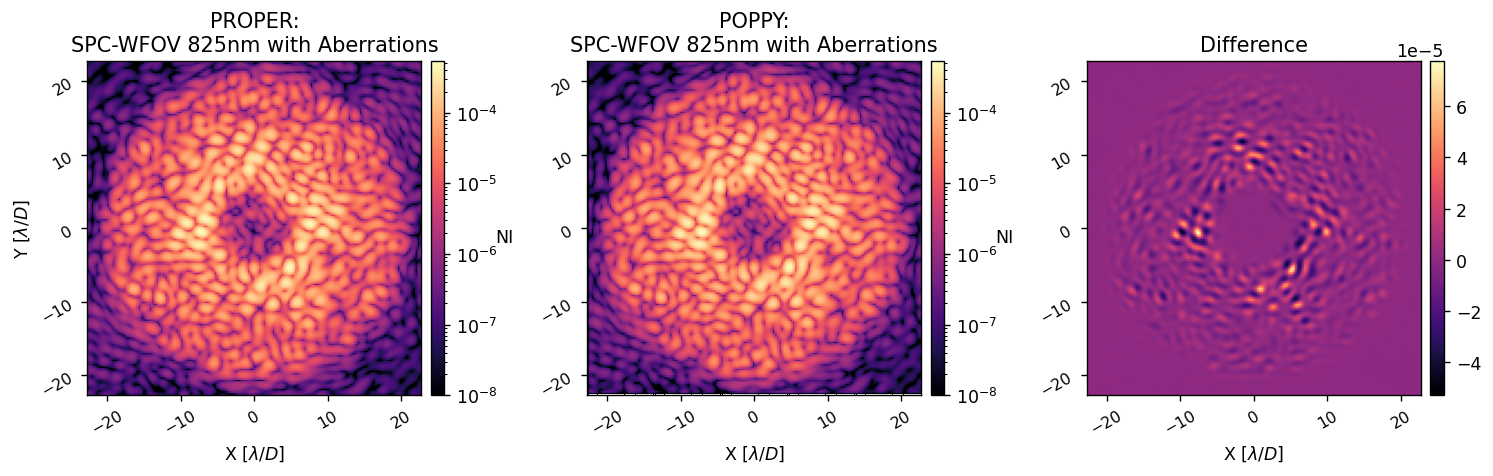

In [9]:
imname = 'SPC-WFOV 825nm with Aberrations'
print(100*abs(mean_ratio))
fig,ax = imshow3(proper_im, poppy_im, diff,
                'PROPER:\n'+imname, 'POPPY:\n'+imname, f'Difference', 
                lognorm1=True, lognorm2=True, 
                vmin1=1e-8, vmin2=1e-8, 
                vmax1=vmax, vmax2=vmax, 
                pxscl=mode.psf_pixelscale_lamD,
                xlabel='X [$\lambda/D$]',
                cbar1_label='NI', cbar2_label='NI', 
                wspace=0.4,
                return_fig=True, display_fig=False,
        )

ax[0].set_ylabel('Y [$\lambda/D$]')
fig.savefig('figs/spc_wfov_825_aberrated.pdf', format='pdf', bbox_inches="tight")
display(fig)